In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# Chemin vers le fichier CSV
fichier_csv = 'Stage-3.csv'

# Chargement du fichier CSV dans un DataFrame
df = pd.read_csv(fichier_csv)

# Afficher les 5 premières lignes
print(df)

    Numéro  Position  Pression (Torr)  Ch. Magnétique (T) Gaz
0       33       0.0              0.0                 0.0  N2
1       34       1.4              5.0                 0.0  N2
2       35       2.0              5.0                 0.0  N2
3       36       2.6              5.0                 0.0  N2
4       37       1.4              5.0                 1.5  N2
5       38       2.0              5.0                 1.5  N2
6       39       2.6              5.0                 1.5  N2
7       41       1.4              1.0                 0.0  N2
8       42       2.0              1.0                 0.0  N2
9       43       2.6              1.0                 0.0  N2
10      44       1.4              1.0                 2.0  N2
11      45       2.0              1.0                 2.0  N2
12      46       2.6              1.0                 2.0  N2
13      47       1.4              1.0                 2.0  N2
14      48       2.0              1.0                 2.0  N2
15      

In [3]:
def load_image(file_path):
    # This two lines will let you open a .tif file as a np matrix.
    # The matrix will have a value of "intensity" in each cell, while .tif file usually contains 
    # more data associated to the camera that acquired the image, but I am no expert on this.
    # For the moment, we only care about the intensity color map 
    img = Image.open(file_path)
    img_data = np.array(img)
    return img_data

In [4]:
ligne_num = int(input())
ligne = df.iloc[ligne_num]

position = ligne['Position']
numero = int(ligne['Numéro'])

 7


In [5]:
file_path =  f"../Stage_Pic/477{numero}.tif"

# Valeurs données
ti = -26.67  # ns
tf = 73.1    # ns

# Définition des valeurs de xi, xf selon la position
if position == 1.4:
    xi, xf = 0.3, 2.6
elif position == 2:
    xi, xf = 0.9, 3.32
elif position == 2.6:
    xi, xf = 1.5, 3.9
else:
    xi, xf = None, None



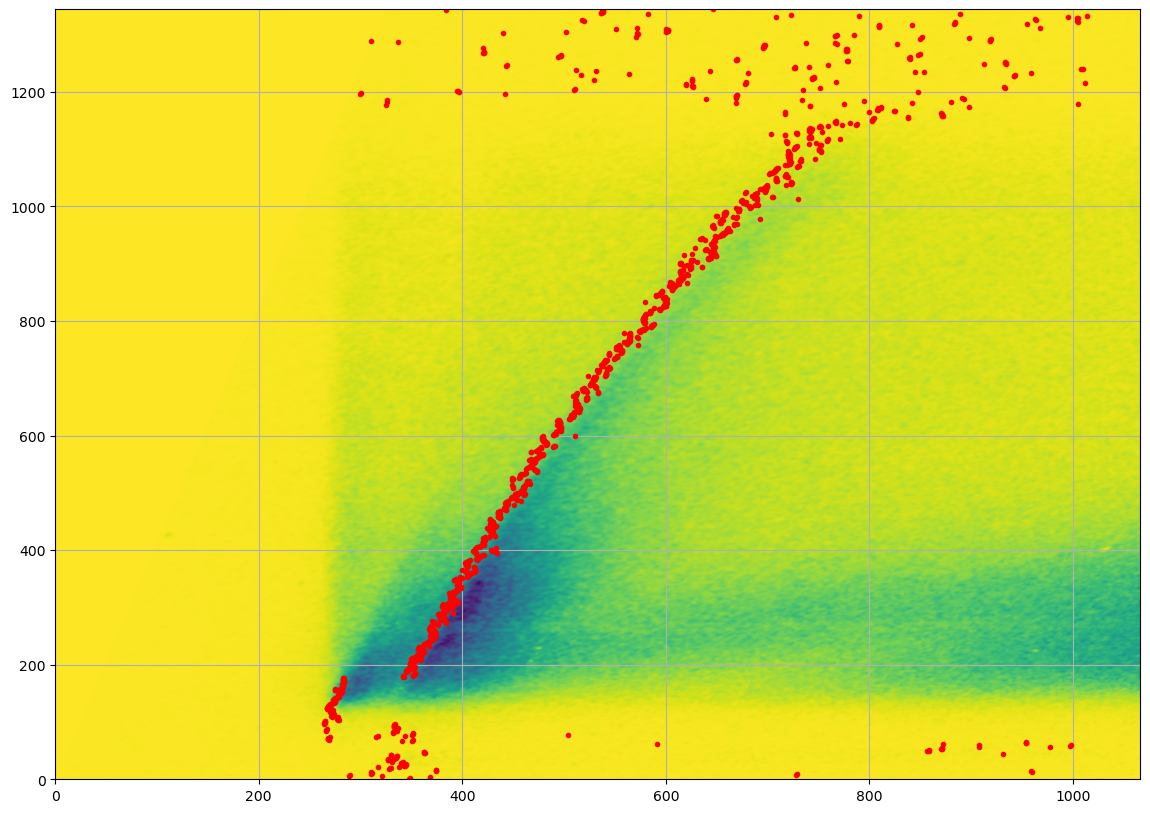

In [6]:
img_data = load_image(file_path)        # Load the image with function as a matrix
img_data = np.flip(img_data, axis = 0)  # Some image will need flipping, some others no.


# Tracer l'image
plt.figure(figsize=(14, 10))
plt.imshow(img_data,                   # Affichage 2D de l'image
           cmap='viridis_r',           # Colormap
           extent=[0, 1066, 0, 1344],
           aspect='auto',              # Ratio automatique
           vmax=np.max(img_data)) # Réglage de la luminosité maximale
plt.grid()

x = np.linspace(0,1344,1344) # pixels horizontaux

L_max = [] # liste des maximums

for ligne in img_data : 
    L_max.append(np.where(ligne == max(ligne))[0][0]) # cherche les maximums de chaque ligne
    
pts = np.array(L_max)
    
plt.plot(np.flip(pts), x, '.', color = 'r')
plt.show()

In [12]:
"""def filtre(L) : # servirais hypothétiquement à filtré les points bruités et/ou mesures imprécises
    vi,vf,v = 0,0,0
    for i in range(0,len(L)-1) :
        if np.abs(L[i+1] - L[i]) < 10 :
            v += 1
            if v == 10 :
                vi = i - 10
                break
        if np.abs(L[i+1] - L[i]) > 10 :
            v = 0
            
    for i in range(vi,len(L)-1) :
        if np.abs(L[i+1] - L[i]) < 20 :
            v = 0
        if np.abs(L[i+1] - L[i]) > 20 :
            v += 1
            if v == 5 :
                vf = i - 5
                break
                
    return vi,vf"""


vi, vf = int(input()), int(input()) # tronque les mesures imprécises
x_filtre = x[vi:vf] # x filtré sans le bruit
pts_filtre = np.flip(pts)[vi:vf] # points filtrés sans le bruit

 200
 1000


In [47]:
def fit(x, a, b, x0) :
    return a * np.abs(x-x0) ** b # fit

p, var = curve_fit(fit, pts_filtre, x_filtre, maxfev = 100000)
a, b, x0 = p

t_fin = np.linspace(0,1066,1066) # tableau des x final
x_fit = fit(x_fin, a, b, x0) # tableau des x fittés

i = 0
while x_fit[i] > x_fit[i+1] : # cherche le pic dans la courbe fit
    i += 1

j = 0
while x_fit[j] <= 1344 : # enlève les possibles valeurs trop grandes
    j += 1
    if j == 1066 :
        break

In [50]:
def pix_to_t(t) :
    return (tf-ti) / 1066 * t + ti

def pix_to_x(x) :
    return (xf-xi) / 1344 * x + xi

t_convert = pix_to_t(t_fin[i:j])
x_convert = pix_to_x(x_fit[i:j])

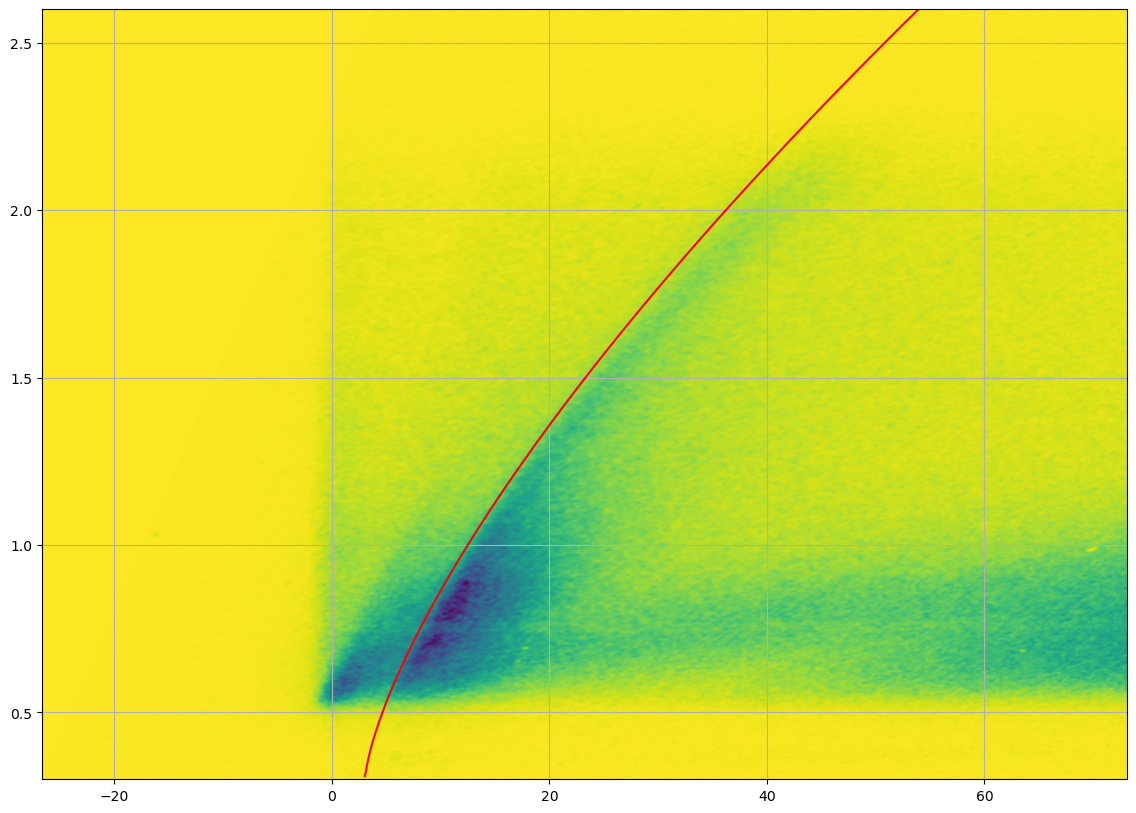

In [51]:
plt.figure(figsize=(14, 10))
plt.imshow(img_data,                   # Affichage 2D de l'image
           cmap='viridis_r',           # Colormap
           extent=[ti, tf, xi, xf],
           aspect='auto',              # Ratio automatique
           vmax=np.max(img_data)) # Réglage de la luminosité maximale
plt.grid()
plt.plot(t_convert, x_convert, color = 'r')
plt.show()

In [55]:
def vitesse(X,T) :
    v = [0]
    for i in range(len(X)-1) :
        v.append((X[i+1] - X[i]) / (T[i+1] - T[i]))
    return v

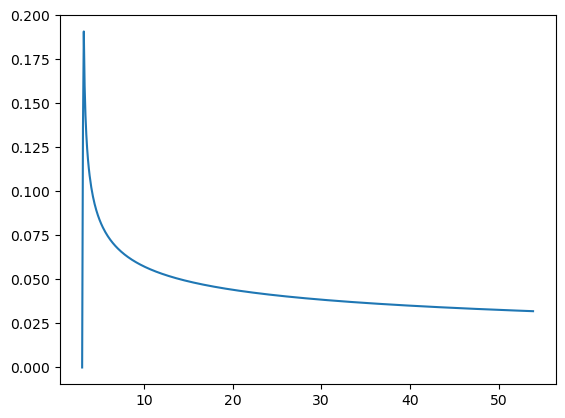

In [56]:
plt.plot(t_convert,vitesse(x_convert,t_convert))